In [1]:
# order sorted list into binary search order
# step1: list to BST
# step2: preorder traversal of BST
# Each item should indicate the index of children
stmt_per_call = 2


# V1, offset
def preorder_bst(lst, idx=0):
    if not lst: return []
    if len(lst) == 1: return [lst[0]]
    mid = len(lst) // 2

    left_lst = lst[:mid]
    right_lst = lst[mid + 1:]
    return [lst[mid]] + \
        preorder_bst(left_lst, idx + 1) + \
        preorder_bst(right_lst, idx + mid + 1)


print(list(enumerate(preorder_bst([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))))

[(0, 6), (1, 3), (2, 2), (3, 1), (4, 5), (5, 4), (6, 9), (7, 8), (8, 7), (9, 10)]


In [2]:
# V2
def preorder_bst(lst, prev_nodes=0):
    if not lst: return []
    if len(lst) == 1: return [(lst[0], None, None)]
    children_left = len(lst) // 2

    left_lst = lst[:children_left]
    right_lst = lst[children_left + 1:]

    left_res = preorder_bst(left_lst, prev_nodes + 1)
    right_res = preorder_bst(right_lst, prev_nodes + children_left + 1)
    # Left child is non-empty because 
    # 2 // 2 = 1, so two element list will have the 2nd element as parent
    mid_item = (lst[children_left], prev_nodes + 1,
                prev_nodes + children_left + 1 if right_lst else None)
    return [mid_item] + left_res + right_res

list(enumerate(preorder_bst([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])))

[(0, (6, 1, 6)),
 (1, (3, 2, 4)),
 (2, (2, 3, None)),
 (3, (1, None, None)),
 (4, (5, 5, None)),
 (5, (4, None, None)),
 (6, (9, 7, 9)),
 (7, (8, 8, None)),
 (8, (7, None, None)),
 (9, (10, None, None))]

In [3]:
def generate_bpf(allowed):
    INSN_PER_CALL = 2
    RET_ALLOW = len(allowed) * INSN_PER_CALL
    RET_BLOCK = RET_ALLOW + 1

    def BPF(i, n, less_idx, greater_idx):
        instructions_before = i * INSN_PER_CALL
        offset_allow = RET_ALLOW - instructions_before - 1

        offset_less = (less_idx * INSN_PER_CALL
                       if less_idx else RET_BLOCK) - instructions_before - 2
        offset_greater = (greater_idx * INSN_PER_CALL if greater_idx else
                          RET_BLOCK) - instructions_before - 2
        return (
            f"BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, {n}, {offset_allow}, 0),\n"
            f"BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, {n}, {offset_greater}, {offset_less}),"
        )

    for i, (n, less_idx, greater_idx) in enumerate(preorder_bst(allowed)):
        print(BPF(i, n, less_idx, greater_idx))
    print(
        "BPF_STMT(BPF_RET | BPF_K, SECCOMP_RET_ALLOW)\nBPF_STMT(BPF_RET | BPF_K, SECCOMP_RET_ERRNO | (error & SECCOMP_RET_DATA))"
    )

BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 6, 19, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 6, 10, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 3, 17, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 3, 4, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 2, 15, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 2, 15, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 1, 13, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 1, 13, 13),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 5, 11, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 5, 11, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 4, 9, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 4, 9, 9),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 9, 7, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 9, 4, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 8, 5, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 8, 5, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 7, 3, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 7, 3, 3),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 10, 1, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 10, 1, 1),
BPF_STMT(BPF_RET | BPF_K, SECCOMP_RET_ALLOW)
BPF_STMT(BPF_RET | BPF_

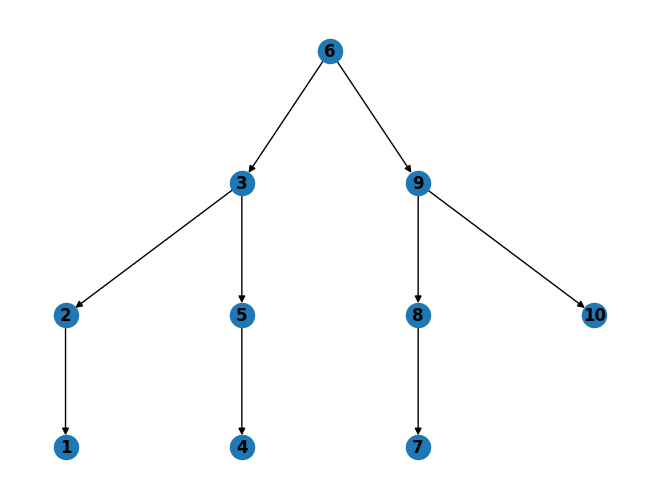

In [4]:
import networkx as nx
#import pydot
from networkx.drawing.nx_pydot import graphviz_layout

edges = []
def avl_edges(lst):
    """
    Returns the root, side effect is to populate the directed edges list
    """
    if not lst: return
    if len(lst) == 1: return lst[0]
    children_left = len(lst) // 2

    left_lst = lst[:children_left]
    right_lst = lst[children_left + 1:]

    parent = lst[children_left]
    if (left := avl_edges(left_lst)) is not None:
        edges.append((parent, left))
    if (right := avl_edges(right_lst)) is not None:
        edges.append((parent, right))
    return parent

avl_edges([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

G = nx.DiGraph()
G.add_edges_from(edges)
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, font_weight='bold')

generate_bpf([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 42, 91, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 42, 46, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 12, 89, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 12, 22, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 6, 87, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 6, 10, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 3, 85, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 3, 4, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 1, 83, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 1, 83, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 0, 81, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 0, 81, 81),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 5, 79, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 5, 79, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 4, 77, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 4, 77, 77),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 9, 75, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 9, 4, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 8, 73, 0),
BPF_JUMP(BPF_JMP | BPF_JGT | BPF_K, 8, 73, 0),
BPF_JUMP(BPF_JMP | BPF_JEQ | BPF_K, 7, 71, 0),
BPF_JUMP(

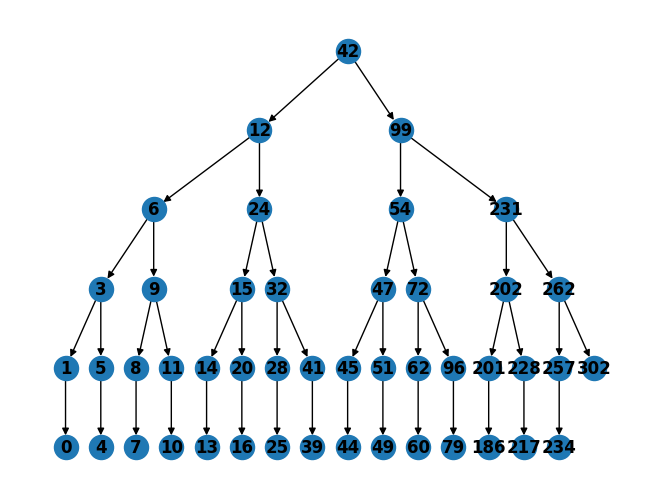

In [5]:
calls = [
    0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 24, 25, 28, 32,
    39, 41, 42, 44, 45, 47, 49, 51, 54, 60, 62, 72, 79, 96, 99, 186, 201, 202,
    217, 228, 231, 234, 257, 262, 302
]

edges = [] 
avl_edges(calls)
G = nx.DiGraph()
G.add_edges_from(edges)
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, font_weight='bold')

generate_bpf(calls)